<a href="https://colab.research.google.com/github/m3nkam/ml-covid19/blob/main/pfe_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importation des librairies
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

#**ANALYSE EXPLORATOIRE**

In [2]:
#Importation du Dataset
url = 'https://raw.githubusercontent.com/m3nkam/ml-covid19/main/datasetcovid19.csv'
data = pd.read_csv(url, index_col=0, encoding = "UTF8")
#Effectuons une copie de nos données 
df_raw = data.copy()
df_raw.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration�(MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,...,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time�(PTT)�,Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase�(CPK)�,Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Déterminons le nombre de lignes et le nombre de colonnes
df_raw.shape

(5644, 110)

In [4]:
#Déterminons et dénombrons les types de variables présent dans le dataset
df_raw.dtypes.value_counts()

float64    70
object     36
int64       4
dtype: int64

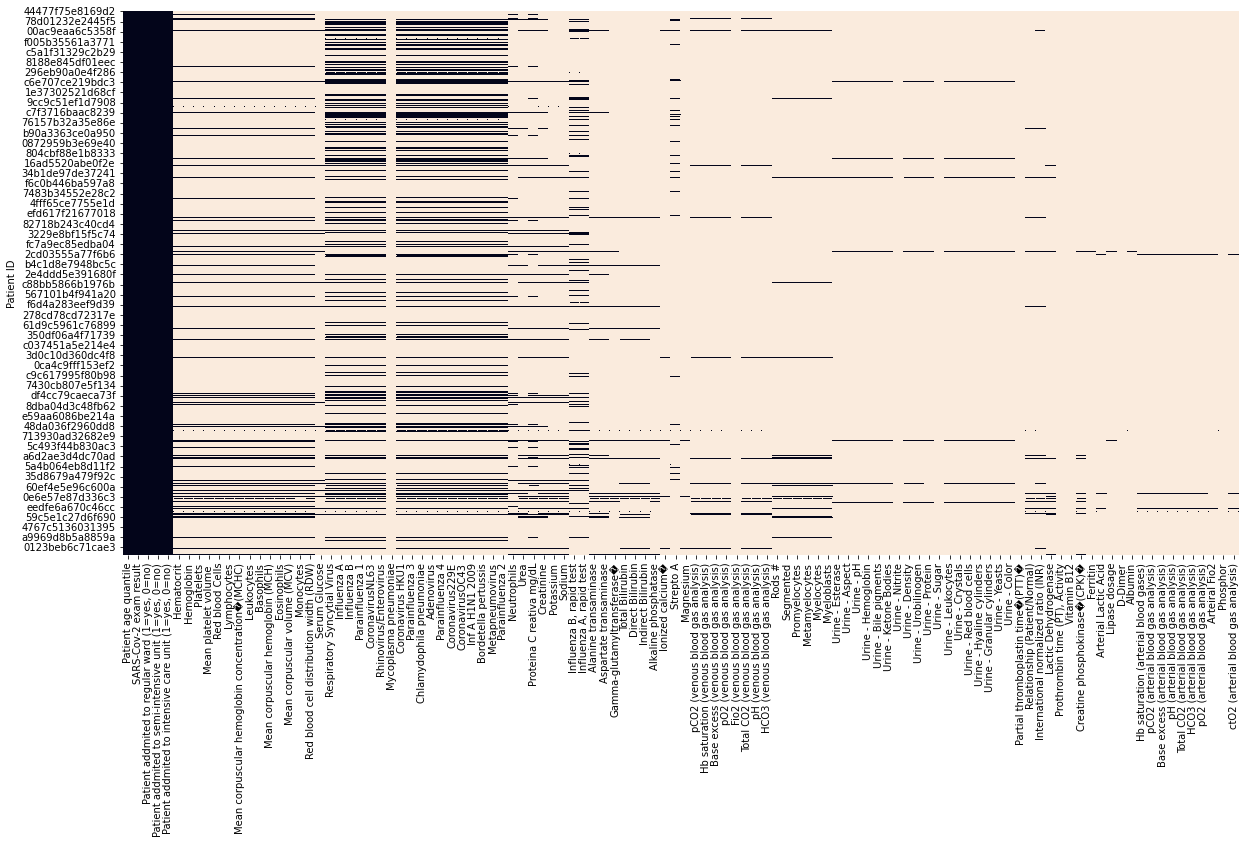

In [5]:
#Visualisons toutes nos données dans une image
plt.figure(figsize = (20,10))
sns.heatmap(df_raw.isna(),cbar=False)

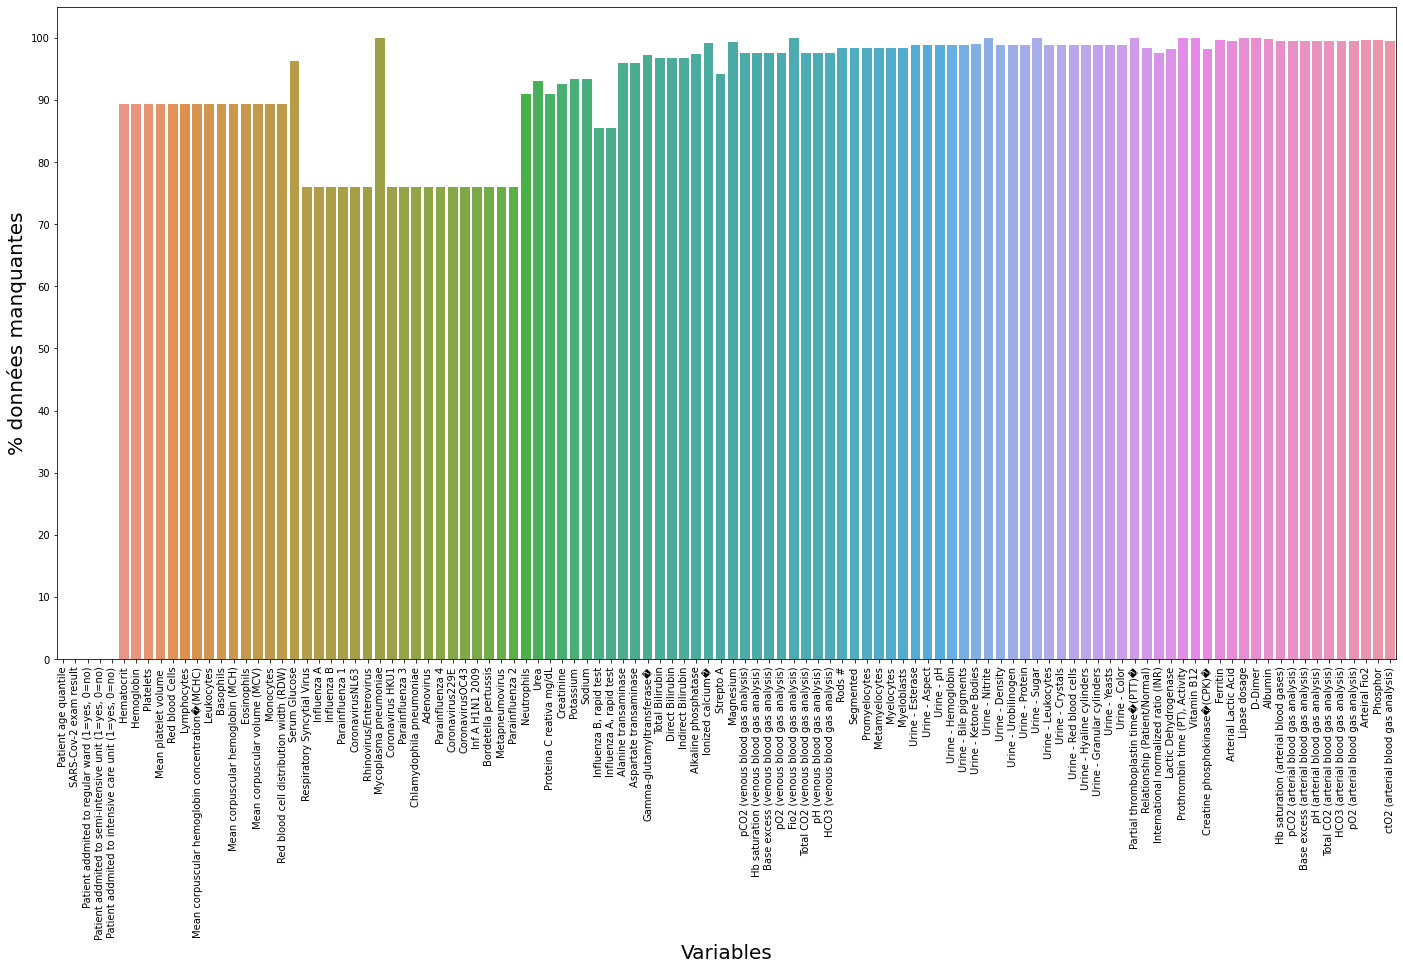

In [6]:
# How many nan have each column
nan_per_column = pd.DataFrame(df_raw.isna().sum(),columns=['nanValues']).reset_index()

# Calculate NaN % for each feature
for i in range(0,len(nan_per_column)):
    nan_per_column.loc[i, 'nanValuesPct'] = 100*round(nan_per_column.loc[i, 'nanValues']/len(df_raw),3)

# Plot - % of missing rows for each column
plt.figure(figsize=(24,12))
sns.barplot(x="index", y="nanValuesPct", data=nan_per_column)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('% données manquantes', fontsize=20)
#plt.title('Missing Data Plot', fontsize=30)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xticks(rotation=90);

In [7]:
(df_raw.isna().sum()/df_raw.shape[0]).sort_values(ascending=True)

Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
Patient addmited to intensive care unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time�(PTT)�                       1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 110, dtype: float64

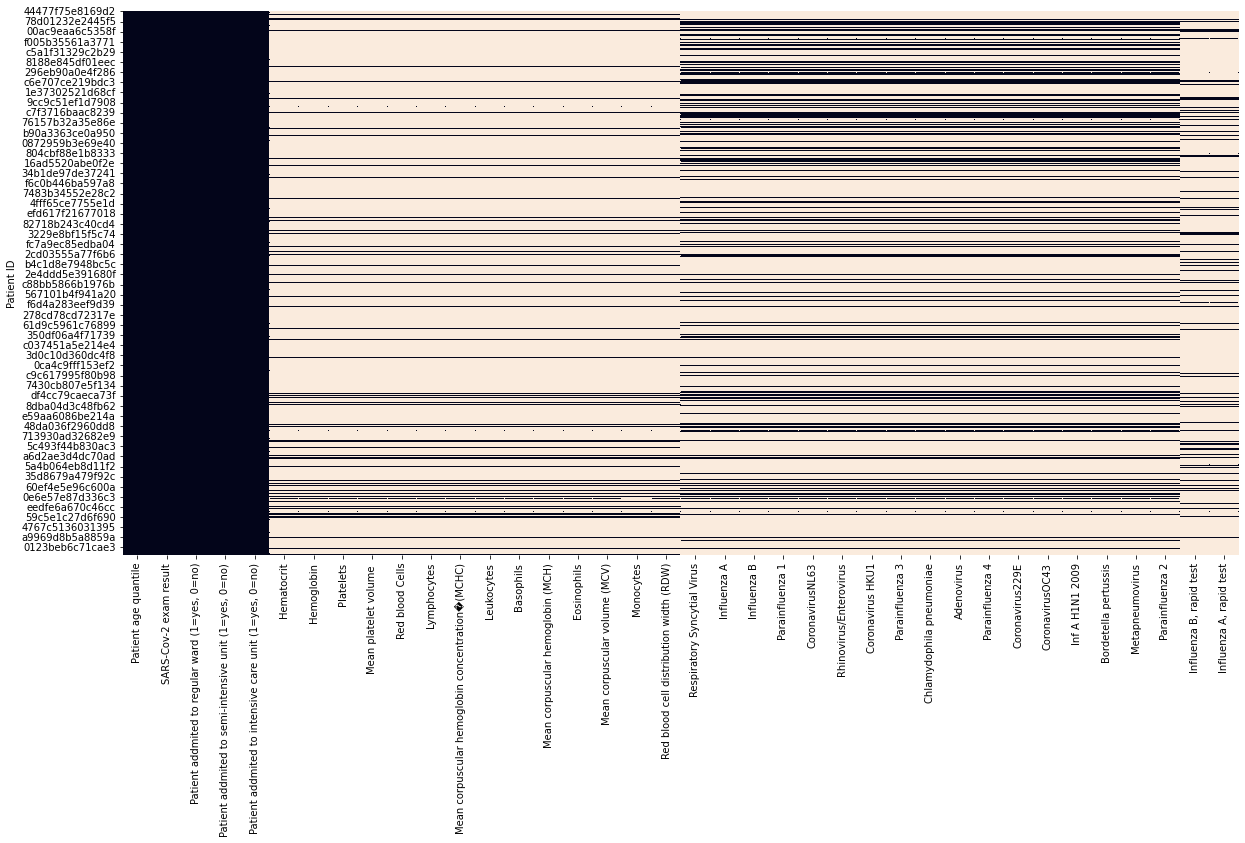

In [8]:
#Elimininons les colonnes qui ont plus de 90% de données manquantes >
#for column in column_with_nan:
# if df[column].isnull().sum()*100.0/df_shape[0] > 90:
#    df.drop(column,1, inplace=True)
#df.columns[df.isna().sum()/df.shape[0]<0.9] les colonnes qui ont moins de 90% de données manquantes
df = df_raw[df_raw.columns[df_raw.isna().sum()/df_raw.shape[0]<0.9]]
df.columns
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(),cbar=False)

In [10]:
# Eliminons également les colonnes rapid test
rapidtest_columns = ['Influenza A, rapid test', 'Influenza B, rapid test']

#df.drop(['Influenza A, rapid test', 'Influenza B, rapid test'],1, inplace=True)
df.drop(rapidtest_columns,1, inplace=True)
# Drop unused columns
#df.drop('Patient ID', axis=1, inplace=True)
# Drop target variable
df.drop('SARS-Cov-2 exam result', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
#Eliminons les colonnes relatifs à l'admission du patient dans un service adéquant
df.drop(['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1,inplace=True)
df.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration�(MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2'],
      dtype='object')

In [12]:
# Defining lists for each family column
detection_adenoviridae = ['Adenovirus']
detection_coronaviridae = ['CoronavirusOC43', 'Coronavirus HKU1', 'CoronavirusNL63', 'Coronavirus229E']
detection_orthomyxoviridae = ['Influenza A', 'Influenza B', 'Inf A H1N1 2009'] 
detection_paramyxoviridae = ['Parainfluenza 2','Parainfluenza 3', 'Parainfluenza 4', 'Parainfluenza 1']
detection_picornaviridae = ['Rhinovirus/Enterovirus']
detection_pneumoviridae = ['Respiratory Syncytial Virus', 'Metapneumovirus']
groups_list = [detection_adenoviridae, detection_coronaviridae, detection_orthomyxoviridae, detection_paramyxoviridae, detection_picornaviridae, detection_pneumoviridae]
groups_cols = ['detection_adenoviridae', 'detection_coronaviridae', 'detection_orthomyxoviridae', 'detection_paramyxoviridae', 'detection_picornaviridae', 'detection_pneumoviridae']

df['detection_coronaviridae'] = df[detection_coronaviridae].sum(axis=1) 
df = df.drop(detection_coronaviridae, axis=1)

df['detection_paramyxoviridae'] = df[detection_paramyxoviridae].sum(axis=1) 
df = df.drop(detection_paramyxoviridae, axis=1)

df['detection_picornaviridae '] = df[detection_picornaviridae ].sum(axis=1) 
df = df.drop(detection_picornaviridae , axis=1)

df['detection_pneumoviridae'] = df[detection_pneumoviridae].sum(axis=1) 
df = df.drop(detection_pneumoviridae , axis=1)

df['detection_orthomyxoviridae'] = df[detection_orthomyxoviridae].sum(axis=1) 
df = df.drop(detection_orthomyxoviridae , axis=1)

df['detection_adenoviridae'] = df[detection_adenoviridae].sum(axis=1) 
df = df.drop(detection_adenoviridae , axis=1)
df.columns


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Index(['Patient age quantile', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration�(MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Chlamydophila pneumoniae',
       'Bordetella pertussis', 'detection_coronaviridae',
       'detection_paramyxoviridae', 'detection_picornaviridae ',
       'detection_pneumoviridae', 'detection_orthomyxoviridae',
       'detection_adenoviridae'],
      dtype='object')

# **ENCODAGE**

In [13]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [14]:
# Verify if new columns are statical features
df = encodage(df)
cat_vars = list()
for j in df.columns:
    if len(df[j].unique()) <= 5:
        print(j, ' - ', df[j].unique())
        cat_vars.append(j)
print('This dataset have now',len(cat_vars), ' discrete variables of ',len(df),'\n')

Chlamydophila pneumoniae  -  [nan  0.  1.]
Bordetella pertussis  -  [nan  0.  1.]
detection_coronaviridae  -  [nan]
detection_paramyxoviridae  -  [nan]
detection_picornaviridae   -  [nan  1.  0.]
detection_pneumoviridae  -  [0.]
detection_orthomyxoviridae  -  [0.]
detection_adenoviridae  -  [nan  0.  1.]
This dataset have now 8  discrete variables of  5644 



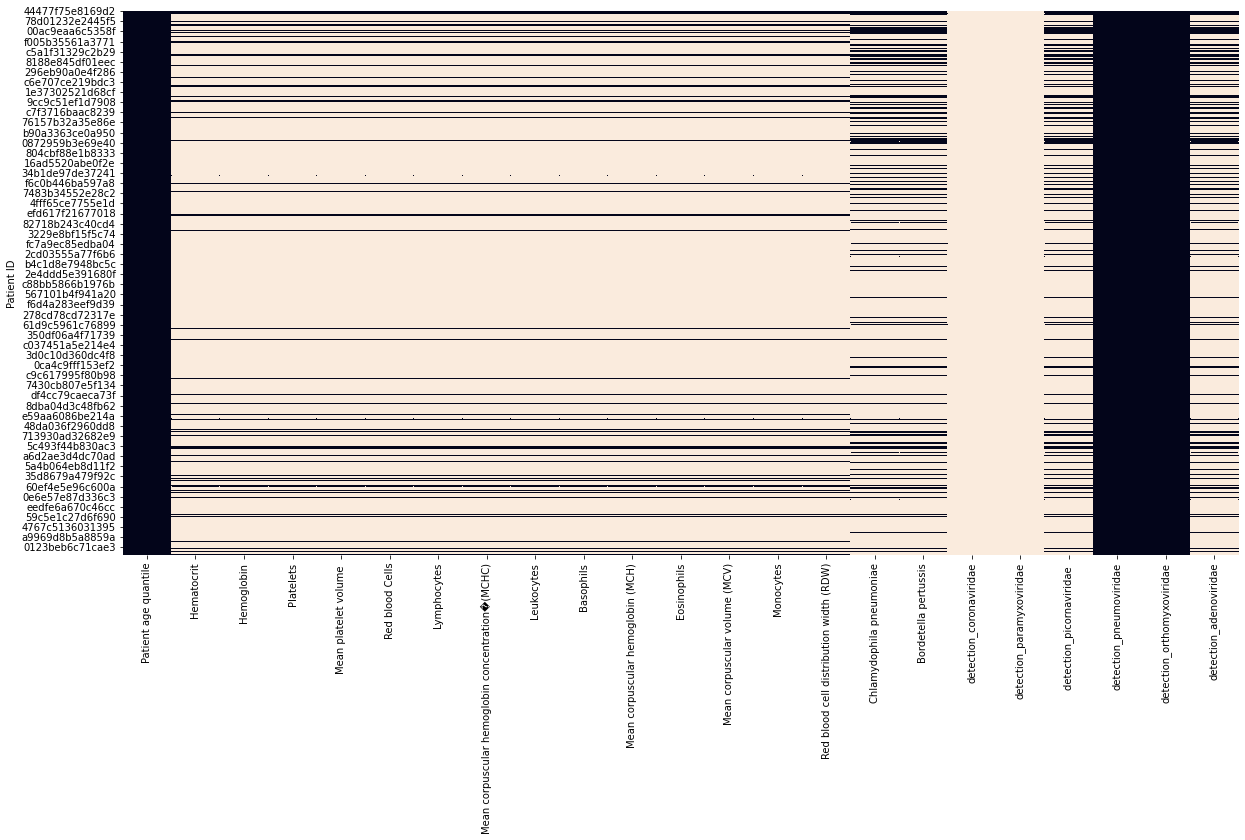

In [15]:
#Visualisons toutes nos données dans une image
plt.figure(figsize = (20,10))
sns.heatmap(df.isna(),cbar=False)

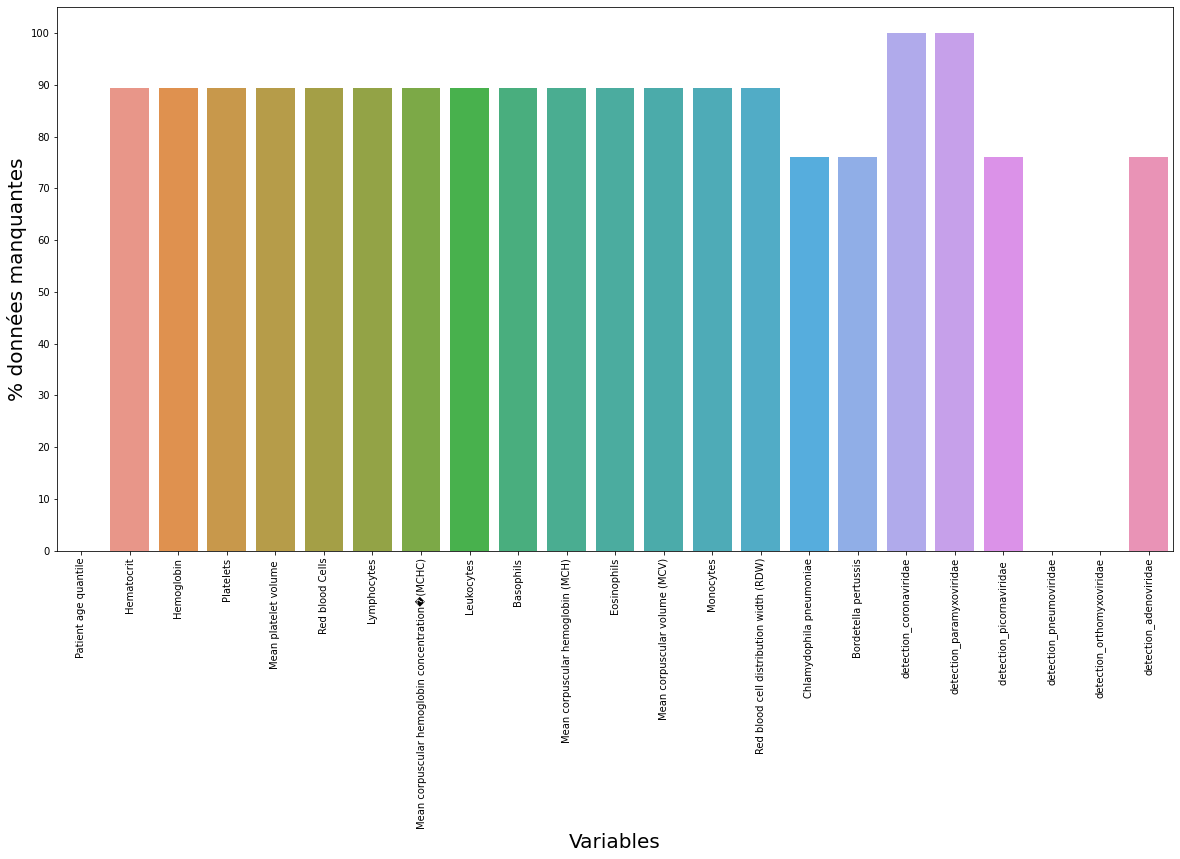

In [16]:
# How many nan have each column
nan_per_column = pd.DataFrame(df.isna().sum(),columns=['nanValues']).reset_index()

# Calculate NaN % for each feature
for i in range(0,len(nan_per_column)):
    nan_per_column.loc[i, 'nanValuesPct'] = 100*round(nan_per_column.loc[i, 'nanValues']/len(df),3)

# Plot - % of missing rows for each column
plt.figure(figsize=(20,10))
sns.barplot(x="index", y="nanValuesPct", data=nan_per_column)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('% données manquantes', fontsize=20)
#plt.title('Missing Data Plot', fontsize=30)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xticks(rotation=90);

**Etude de la correlation**

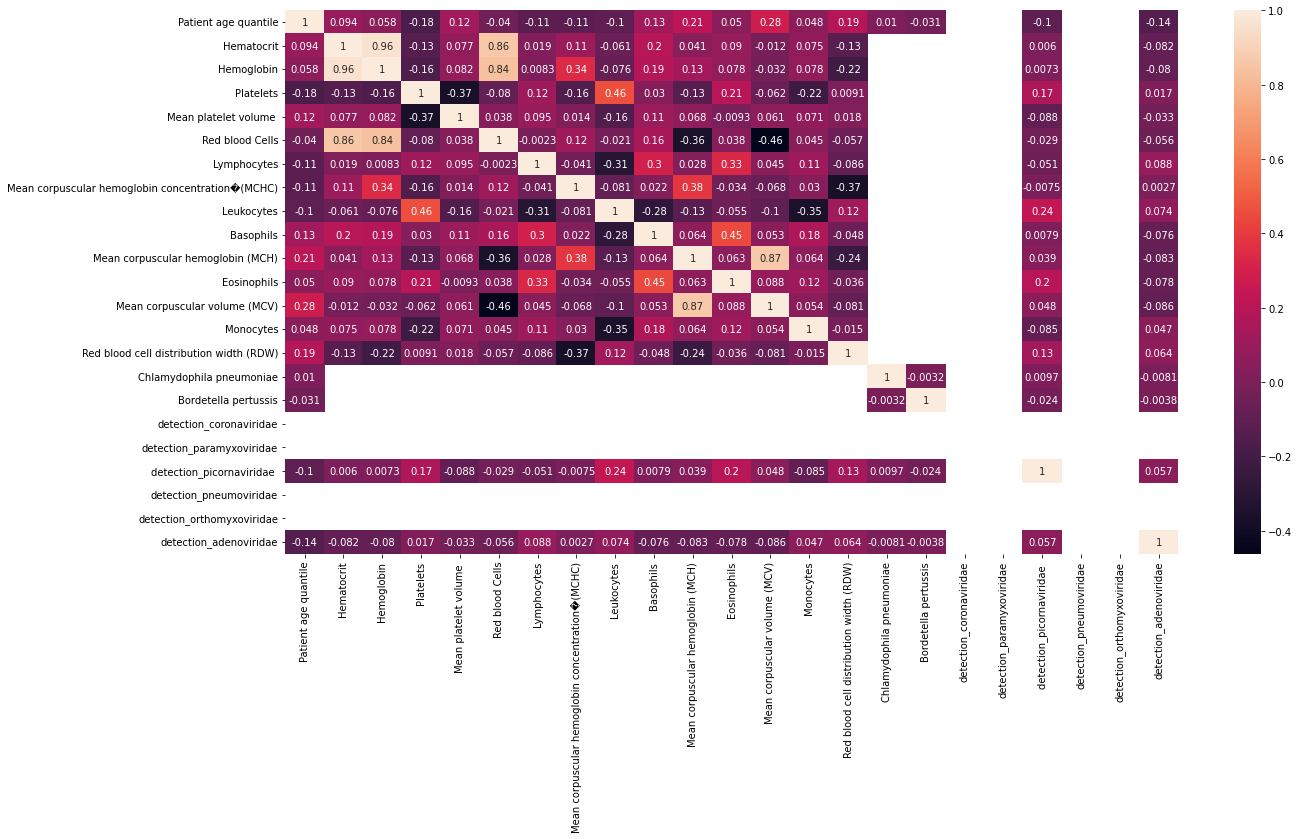

In [17]:
# Correlation calculation
spearman_corr = df.corr('spearman')
# Plot
plt.figure(figsize=(20,10))
sns.heatmap(spearman_corr, annot = True);

# **PRE-TRAITEMENT DES DONNEES**

**Imputation des données**

In [ ]:
def imputation(df):
    # Eliminons la target variable
    df.drop('SARS-Cov-2 exam result', axis=1, inplace=True)
    # Drop unused columns
    #df.drop('Patient ID', axis=1, inplace=True)
    #Eliminons les colonnes relatifs à l'admission du patient dans un service adéquant
    df.drop(['Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1,inplace=True)
    # Eliminons également les colonnes rapid test
    df.drop(['Influenza A, rapid test', 'Influenza B, rapid test'],1, inplace=True)
    # Eliminons les données invariables
    df.drop('detection_pneumoviridae', axis=1, inplace=True)
    df.drop('detection_orthomyxoviridae', axis=1, inplace=True)
    return  df

**Encodage des variables catégorielles**

In [ ]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

**FEATURE ENGINEERING**

In [ ]:
def feature_engineering(df):
    # Définition des listes de chaque nouvelle colonne
    detection_adenoviridae = ['Adenovirus']
    detection_coronaviridae = ['CoronavirusOC43', 'Coronavirus HKU1', 'CoronavirusNL63', 'Coronavirus229E']
    detection_orthomyxoviridae = ['Influenza A', 'Influenza B', 'Inf A H1N1 2009'] 
    detection_paramyxoviridae = ['Parainfluenza 2','Parainfluenza 3', 'Parainfluenza 4', 'Parainfluenza 1']
    detection_picornaviridae = ['Rhinovirus/Enterovirus']
    detection_pneumoviridae = ['Respiratory Syncytial Virus', 'Metapneumovirus']
    #Création des nouvelles variables
    df['detection_coronaviridae'] = df[detection_coronaviridae].sum(axis=1) 
    df = df.drop(detection_coronaviridae, axis=1)

    df['detection_paramyxoviridae'] = df[detection_paramyxoviridae].sum(axis=1) 
    df = df.drop(detection_paramyxoviridae, axis=1)

    df['detection_picornaviridae '] = df[detection_picornaviridae ].sum(axis=1) 
    df = df.drop(detection_picornaviridae , axis=1)

    df['detection_pneumoviridae'] = df[detection_pneumoviridae].sum(axis=1) 
    df = df.drop(detection_pneumoviridae , axis=1)

    df['detection_orthomyxoviridae'] = df[detection_orthomyxoviridae].sum(axis=1) 
    df = df.drop(detection_orthomyxoviridae , axis=1)

    df['detection_adenoviridae'] = df[detection_adenoviridae].sum(axis=1) 
    df = df.drop(detection_adenoviridae , axis=1)

    return df